In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from tqdm import tqdm

In [2]:
# Upload the required files
from google.colab import files
files.upload()

Saving X_test.txt to X_test.txt
Saving X_train.txt to X_train.txt
Saving y_test.txt to y_test.txt
Saving y_train.txt to y_train.txt


In [3]:
# Load the training set with a regular expression delimiter
X_train_raw = pd.read_csv('/content/X_train.txt', delimiter=r'\s+', header=None, engine='python')
y_train_raw = pd.read_csv('/content/y_train.txt', header=None, names=['activity'])

In [4]:
X_test_raw = pd.read_csv('/content/X_test.txt', delimiter=r'\s+', header=None, engine='python')
y_test_raw = pd.read_csv('/content/y_test.txt', header=None, names=['activity'])

In [5]:
# Check for missing values
print("Missing values in X_train:", X_train_raw.isnull().sum().sum())
print("Missing values in y_train:", y_train_raw.isnull().sum().sum())

print("Missing values in X_test:", X_test_raw.isnull().sum().sum())
print("Missing values in y_test:", y_test_raw.isnull().sum().sum())

Missing values in X_train: 0
Missing values in y_train: 0
Missing values in X_test: 0
Missing values in y_test: 0


EDA AND VISUALIZATIONS

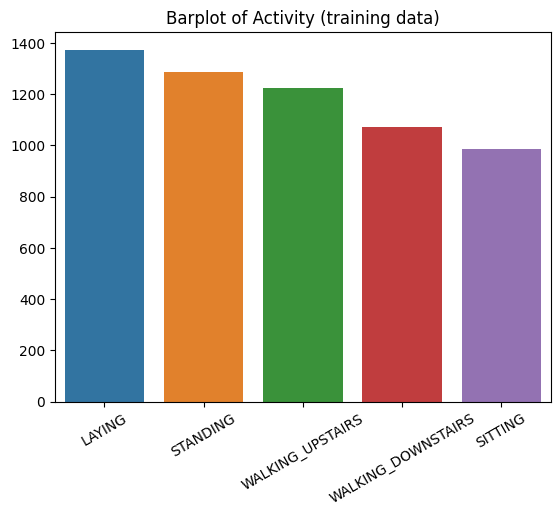

In [6]:
activity_labels = {0: 'WALKING', 1: 'WALKING_UPSTAIRS', 2: 'WALKING_DOWNSTAIRS', 3: 'SITTING', 4: 'STANDING', 5: 'LAYING'}
y_train_plot = y_train_raw.copy()
y_train_plot = y_train_plot['activity'].map(activity_labels)

plt.title("Barplot of Activity (training data)")
sns.barplot(y = y_train_plot.value_counts().values , x = y_train_plot.value_counts().index)
plt.xticks(rotation = 30)
plt.show()

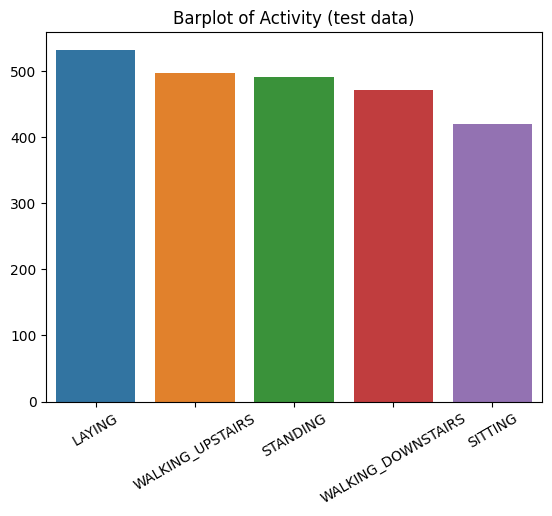

In [7]:
activity_labels = {0: 'WALKING', 1: 'WALKING_UPSTAIRS', 2: 'WALKING_DOWNSTAIRS', 3: 'SITTING', 4: 'STANDING', 5: 'LAYING'}
y_test_plot = y_test_raw.copy()
y_test_plot = y_test_plot['activity'].map(activity_labels)

plt.title("Barplot of Activity (test data)")
sns.barplot(y = y_test_plot.value_counts().values , x = y_test_plot.value_counts().index)
plt.xticks(rotation = 30)
plt.show()

In [8]:
# Encode activity labels
label_encoder = LabelEncoder()
y_train_raw = pd.DataFrame(label_encoder.fit_transform(y_train_raw['activity']))
y_test_raw = pd.DataFrame(label_encoder.fit_transform(y_test_raw['activity']))

In [9]:
# Display the first few rows of the loaded data
print("X_train shape:", X_train_raw.shape)
print("y_train shape:", y_train_raw.shape)

print("X_test shape:", X_test_raw.shape)
print("y_test shape:", y_test_raw.shape)

X_train shape: (7352, 561)
y_train shape: (7352, 1)
X_test shape: (2947, 561)
y_test shape: (2947, 1)


In [10]:
# Shape of the dataset
print(X_train_raw.shape)

# Data types
print(X_train_raw.dtypes)

# Display first few rows
print(X_train_raw.head())


(7352, 561)
0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
556    float64
557    float64
558    float64
559    float64
560    float64
Length: 561, dtype: object
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.

In [11]:
# Basic statistics and information about the dataset
print(X_train_raw.describe())
print(X_train_raw.info())

               0            1            2            3            4    \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.274488    -0.017695    -0.109141    -0.605438    -0.510938   
std       0.070261     0.040811     0.056635     0.448734     0.502645   
min      -1.000000    -1.000000    -1.000000    -1.000000    -0.999873   
25%       0.262975    -0.024863    -0.120993    -0.992754    -0.978129   
50%       0.277193    -0.017219    -0.108676    -0.946196    -0.851897   
75%       0.288461    -0.010783    -0.097794    -0.242813    -0.034231   
max       1.000000     1.000000     1.000000     1.000000     0.916238   

               5            6            7            8            9    ...  \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000  ...   
mean     -0.604754    -0.630512    -0.526907    -0.606150    -0.468604  ...   
std       0.418687     0.424073     0.485942     0.414122     0.544547  ...   
min      -1.00000

In [12]:
print(X_test_raw.describe())
print(X_test_raw.info())

               0            1            2            3            4    \
count  2947.000000  2947.000000  2947.000000  2947.000000  2947.000000   
mean      0.273996    -0.017863    -0.108386    -0.613635    -0.508330   
std       0.060570     0.025745     0.042747     0.412597     0.494269   
min      -0.592004    -0.362884    -0.576184    -0.999606    -1.000000   
25%       0.262075    -0.024961    -0.121162    -0.990914    -0.973664   
50%       0.277113    -0.016967    -0.108458    -0.931214    -0.790972   
75%       0.288097    -0.010143    -0.097123    -0.267395    -0.105919   
max       0.671887     0.246106     0.494114     0.465299     1.000000   

               5            6            7            8            9    ...  \
count  2947.000000  2947.000000  2947.000000  2947.000000  2947.000000  ...   
mean     -0.633797    -0.641278    -0.522676    -0.637038    -0.462063  ...   
std       0.362699     0.385199     0.479899     0.357753     0.523916  ...   
min      -0.99895

In [13]:
# Percentage of missing values
missing_percentage = X_train_raw.isnull().sum() * 100 / len(X_train_raw)
print(missing_percentage)


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
556    0.0
557    0.0
558    0.0
559    0.0
560    0.0
Length: 561, dtype: float64


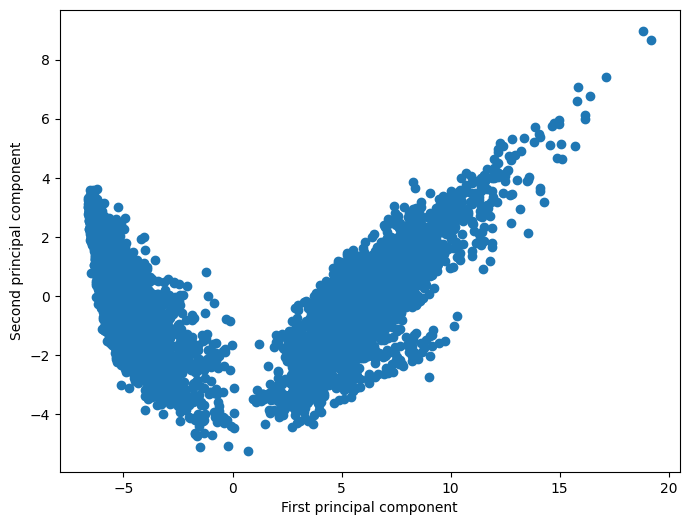

In [14]:
# PCA for visualization (consider standardizing data first)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_raw)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()


The PCA graph shows a scatter plot of the dataset projected onto the first two principal components. These components are linear combinations of the original variables that capture the maximum variance within the data. The shape of the distribution suggests two or more subgroups within the dataset. The spread along the principal component axes indicates that these components explain a significant portion of the data's variability. The gap in the center hints at possible clustering, although the absence of clear separation between clusters may suggest complex underlying relationships that PCA, as a linear method, cannot fully disentangle. The presence of outliers, particularly towards the right side of the plot, could represent extreme cases or anomalies in the data. Overall, the PCA graph provides a visual summary of the data, highlighting potential patterns and areas for further investigation.

In [15]:
# Standardize the features using StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_raw))

X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test_raw))

In [16]:
# Display the shapes of the preprocessed data
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:", X_test_scaled.shape)

print("y_train shape:", y_train_raw.shape)
print("y_val shape:", y_test_raw.shape)

X_train_scaled shape: (7352, 561)
X_val_scaled shape: (2947, 561)
y_train shape: (7352, 1)
y_val shape: (2947, 1)


## PCA

In [18]:
# Importing the PCA class from scikit-learn's decomposition module
from sklearn.decomposition import PCA

# Creating a PCA object with the desired number of components to retain a specific amount of variance
# In this case, n_components=0.95 means that the algorithm will keep enough principal components
# to retain 95% of the variance in the data.
pca = PCA(n_components=0.95)

# Transforming the training data using PCA
# X_train_scaled is assumed to be the training data that has been preprocessed or scaled before applying PCA.
# The fit_transform method fits the PCA model to the training data and then transforms it.
X_train_pca = pca.fit_transform(X_train_scaled)

# Transforming the test data using the same PCA model
# X_test_scaled is assumed to be the test data that has been preprocessed or scaled similarly to the training data.
# The transform method applies the previously fitted PCA model to the test data.
X_test_pca = pca.transform(X_test_scaled)


**MODELS**

1. Gaussian Naive Bayes

The Gaussian Naive Bayes algorithm is well-suited for Human Activity Recognition using Smartphones because it efficiently handles high-dimensional data like sensor readings. This algorithm assumes each feature is independent, simplifying calculations and making it ideal for large datasets. Gaussian Naive Bayes also works well with continuous data, typical in smartphone sensors. It provides a solid baseline for performance comparison with more complex models, making it a practical choice for initial classification tasks in this project.

In [19]:
class GaussianNaiveBayes:
    """
    Gaussian Naive Bayes classifier implementation.
    This classifier assumes that the features follow a Gaussian distribution.
    """

    def __init__(self, data, target):
        """
        Constructor for the GaussianNaiveBayes class.

        Parameters:
        data (array-like): Features dataset. Can be a pandas DataFrame or numpy array.
        target (array-like): Target variable (labels). Can be a pandas DataFrame/Series or numpy array.
        """
        self.data = data
        # Ensuring that the target is a 1D numpy array for compatibility.
        self.target = target.values.flatten() if isinstance(target, (pd.DataFrame, pd.Series)) else target.flatten()

    def gaussian(self, X, mean, std):
        """
        Calculates the Gaussian probability distribution for each feature.

        Parameters:
        X (numpy array): Array of features.
        mean (float): Mean of the feature.
        std (float): Standard deviation of the feature.

        Returns:
        numpy array: Gaussian probabilities for the given feature.
        """
        exponent = np.exp(-(X - mean)**2 / (2 * std**2))
        return exponent / (np.sqrt(2 * np.pi) * std)

    def gaussian_fit(self, X):
        """
        Computes the mean and standard deviation for each feature in the dataset.

        Parameters:
        X (numpy array): Array of features.

        Returns:
        tuple: Mean and standard deviation of each feature.
        """
        return X.mean(axis=0), X.std(axis=0)

    def fit(self):
        """
        Fits the Gaussian Naive Bayes model to the data.
        This method computes the prior probabilities of the classes
        and the mean and standard deviation of each feature for each class.
        """
        unique_classes, counts = np.unique(self.target, return_counts=True)
        self.classes = {label: idx for idx, label in enumerate(unique_classes)}
        self.prior = counts / counts.sum()
        self.pdf_data = {label: self.gaussian_fit(self.data[self.target == label]) for label in unique_classes}

    def predict(self, X):
        """
        Predicts the class labels for the given dataset.

        Parameters:
        X (numpy array): Array of features to predict.

        Returns:
        numpy array: Predicted class labels.
        """
        y_pred = []
        for x_data in X:
            scores = {}
            for label, idx in self.classes.items():
                mean_list, std_list = self.pdf_data[label]
                likelihood = np.prod(self.gaussian(x_data, mean_list, std_list))
                posterior = likelihood * self.prior[idx]
                scores[label] = posterior
            y_pred.append(max(scores, key=scores.get))
        return np.array(y_pred)

    def compute_metrics(self, y_true, y_pred):
        """
        Computes accuracy, macro precision, macro recall, and macro F1-score.

        Parameters:
        y_true (numpy array): True class labels.
        y_pred (numpy array): Predicted class labels.

        Returns:
        dict: Dictionary containing accuracy, macro precision, recall, and F1 score.
        """
        # Convert y_true and y_pred to numpy arrays for consistency
        y_true = y_true.values.flatten() if isinstance(y_true, (pd.DataFrame, pd.Series)) else y_true.flatten()
        y_pred = y_pred.values.flatten() if isinstance(y_pred, (pd.DataFrame, pd.Series)) else y_pred.flatten()

        # Compute confusion matrix
        unique_labels = np.unique(np.concatenate([y_true, y_pred]))
        conf_matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)
        label_to_index = {label: index for index, label in enumerate(unique_labels)}

        for true, pred in zip(y_true, y_pred):
            true_index = label_to_index[true]
            pred_index = label_to_index[pred]
            conf_matrix[true_index, pred_index] += 1

        return self.calculate_overall_metrics(conf_matrix, unique_labels)

    def calculate_overall_metrics(self, conf_matrix, unique_labels):
        """
        Helper method to calculate overall metrics from the confusion matrix.

        Parameters:
        conf_matrix (numpy array): Confusion matrix.
        unique_labels (numpy array): Array of unique labels.

        Returns:
        dict: Dictionary containing accuracy, macro precision, recall, and F1 score.
        """
        sum_precision = 0
        sum_recall = 0
        sum_f1 = 0

        for i in range(len(unique_labels)):
            TP = conf_matrix[i, i]
            FP = conf_matrix[:, i].sum() - TP
            FN = conf_matrix[i, :].sum() - TP

            Precision = TP / (TP + FP) if (TP + FP) != 0 else 0
            Recall = TP / (TP + FN) if (TP + FN) != 0 else 0
            F1_score = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) != 0 else 0

            sum_precision += Precision
            sum_recall += Recall
            sum_f1 += F1_score

        macro_precision = sum_precision / len(unique_labels)
        macro_recall = sum_recall / len(unique_labels)
        macro_f1 = sum_f1 / len(unique_labels)
        accuracy = np.diag(conf_matrix).sum() / conf_matrix.sum()

        return {
            "Accuracy": accuracy,
            "Macro Precision": macro_precision,
            "Macro Recall": macro_recall,
            "Macro F1 Score": macro_f1
        }


In [24]:
# Importing the GaussianNaiveBayes class (assuming it's a custom implementation or part of another library)
model_gnb = GaussianNaiveBayes(X_train_pca, y_train_raw)

# Fitting the Gaussian Naive Bayes model to the training data
model_gnb.fit()


In [25]:
predictions = model_gnb.predict(X_test_pca)

In [26]:
# Evaluate
gnb_metrics = model_gnb.compute_metrics(y_test_raw, predictions)

# Print overall metrics
for metric, value in gnb_metrics.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.8018
Macro Precision: 0.8089
Macro Recall: 0.7960
Macro F1 Score: 0.7974


Advantages of using Gaussian Naives Bayes algorithm

Assumption of Feature Independence: Gaussian Naive Bayes operates under the assumption that the features are independent of each other given the class label. This simplifies the computation, especially in cases where dealing with the full covariance matrix of the features is computationally infeasible.

Gaussian Distribution of Features: If the features of your dataset are continuous and are assumed to follow a Gaussian (normal) distribution, Gaussian Naive Bayes is an appropriate model. It uses the mean and variance of each feature to estimate the probability distributions.

Efficiency: This algorithm is known for its efficiency and speed, especially when working with large datasets. It can quickly make predictions after being trained, which is beneficial in time-sensitive applications.

Good Baseline Model: Gaussian Naive Bayes often serves as a good baseline model. Due to its simplicity and speed, it's useful to initially apply it to the dataset and gauge its performance before moving on to more complex algorithms.

Interpretability: Compared to more complex models like neural networks, Gaussian Naive Bayes is relatively interpretable. It's easier to understand the impact of feature values on the predictions made by the model.

Handling of Missing Values: Naive Bayes classifiers can handle missing data. Features are treated independently, so missing values in one feature don't affect the computation for other features.

Applicability in Multi-class Problems: Gaussian Naive Bayes can be easily extended to multi-class classification problems without any modifications to the underlying algorithm.

Robustness to Irrelevant Features: Naive Bayes classifiers, in general, can be quite robust to the inclusion of irrelevant features because they just contribute to the evidence without swaying it disproportionately.

Project-Specific Context: The algorithm may align well with the specific objectives or constraints of your project. For example, if the project aims to classify data where features are assumed to be normally distributed, Gaussian Naive Bayes becomes a suitable choice.

Data Availability: Naive Bayes works well even with a small amount of data and doesn’t require a large dataset to achieve reasonable performance.

2. SOFTMAX LOGISTIC REGRESSION

Applying softmax regression (also known as multinomial logistic regression) to the Human Activity Recognition project using smartphones is suitable because it is effective for multi-class classification problems. This algorithm can handle multiple classes seamlessly, which is crucial for differentiating various human activities like walking, sitting, and standing. Softmax regression is particularly adept at managing probabilities for each class, providing a more nuanced understanding than simple binary classification. Moreover, it works well with high-dimensional datasets, like those derived from smartphone sensors, ensuring robust performance even with complex input data.

In [27]:
class SoftmaxRegression:
    """
    Softmax Regression classifier.
    This classifier is a generalization of logistic regression to multiple classes.
    """

    def __init__(self, learning_rate=0.01, tolerance=1e-4, max_iteration=1000):
        """
        Initializes the SoftmaxRegression classifier with specified learning rate, tolerance, and maximum iterations.

        Parameters:
        learning_rate (float): The step size at each iteration while moving toward a minimum of the loss function.
        tolerance (float): The stopping criterion for the loss improvement.
        max_iteration (int): The maximum number of iterations for gradient descent.
        """
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iteration = max_iteration

    def softmax(self, z):
        """
        Computes the softmax function for each row of the input array.

        Parameters:
        z (numpy array): The input data.

        Returns:
        numpy array: The softmax of input.
        """
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy_loss(self, X, y_encoded, probabilities):
        """
        Computes the cross-entropy loss.

        Parameters:
        X (numpy array): The input data.
        y_encoded (numpy array): One-hot encoded target values.
        probabilities (numpy array): The probabilities as predicted by softmax.

        Returns:
        float: The computed cross-entropy loss.
        """
        m = X.shape[0]
        loss = - (1 / m) * np.sum(y_encoded * np.log(probabilities))
        return loss

    def fit(self, X, y):
        """
        Fits the Softmax Regression model to the training data.

        Parameters:
        X (numpy array): Training features.
        y (numpy array): Training target values.
        """
        # One-hot encoding of y
        self.classes = np.unique(y)
        y_encoded = self.one_hot_encode(y)

        # Initialize weights
        self.w = np.zeros((X.shape[1], len(self.classes)))

        # Gradient descent
        for _ in tqdm(range(self.max_iteration)):
            # Compute softmax probabilities
            probabilities = self.softmax(X.dot(self.w))

            # Compute gradient
            grad = X.T.dot(probabilities - y_encoded) / X.shape[0]

            # Update weights
            self.w -= self.learning_rate * grad

            # Check for convergence
            if np.linalg.norm(grad) < self.tolerance:
                break

    def predict(self, X):
        """
        Predicts the class labels for the given dataset.

        Parameters:
        X (numpy array): Array of features to predict.

        Returns:
        numpy array: Predicted class labels.
        """
        probabilities = self.softmax(X.dot(self.w))
        return np.array([self.classes[i] for i in np.argmax(probabilities, axis=1)])

    def one_hot_encode(self, y):
        """
        One-hot encodes the target values.

        Parameters:
        y (numpy array or pandas Series/DataFrame): Target values.

        Returns:
        numpy array: One-hot encoded array.
        """
        if isinstance(y, (pd.DataFrame, pd.Series)):
            y = y.values

        y = y.ravel()  # Flatten the array to make it 1D
        y_encoded = np.zeros((y.size, len(self.classes)))
        for i, class_ in enumerate(self.classes):
            y_encoded[:, i] = (y == class_)
        return y_encoded

    def compute_metrics(self, y_true, y_pred):
        """
        Computes and returns various classification metrics.

        Parameters:
        y_true (numpy array or pandas Series/DataFrame): True class labels.
        y_pred (numpy array or pandas Series/DataFrame): Predicted class labels.

        Returns:
        dict: Dictionary containing accuracy, macro precision, recall, and F1 score.
        """
        # Convert y_true and y_pred to numpy arrays for consistency
        y_true = y_true.values.flatten() if isinstance(y_true, (pd.DataFrame, pd.Series)) else y_true.flatten()
        y_pred = y_pred.values.flatten() if isinstance(y_pred, (pd.DataFrame, pd.Series)) else y_pred.flatten()

        # Compute confusion matrix
        unique_labels = np.unique(np.concatenate([y_true, y_pred]))
        conf_matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)
        label_to_index = {label: index for index, label in enumerate(unique_labels)}

        for true, pred in zip(y_true, y_pred):
            true_index = label_to_index[true]
            pred_index = label_to_index[pred]
            conf_matrix[true_index, pred_index] += 1

        return self.calculate_overall_metrics(conf_matrix, unique_labels)

    def calculate_overall_metrics(self, conf_matrix, unique_labels):
        """
        Helper method to calculate overall metrics from the confusion matrix.

        Parameters:
        conf_matrix (numpy array): Confusion matrix.
        unique_labels (numpy array): Array of unique labels.

        Returns:
        dict: Dictionary containing accuracy, macro precision, recall, and F1 score.
        """
        sum_precision = 0
        sum_recall = 0
        sum_f1 = 0

        for i in range(len(unique_labels)):
            TP = conf_matrix[i, i]
            FP = conf_matrix[:, i].sum() - TP
            FN = conf_matrix[i, :].sum() - TP

            Precision = TP / (TP + FP) if (TP + FP) != 0 else 0
            Recall = TP / (TP + FN) if (TP + FN) != 0 else 0
            F1_score = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) != 0 else 0

            sum_precision += Precision
            sum_recall += Recall
            sum_f1 += F1_score

        macro_precision = sum_precision / len(unique_labels)
        macro_recall = sum_recall / len(unique_labels)
        macro_f1 = sum_f1 / len(unique_labels)
        accuracy = np.diag(conf_matrix).sum() / conf_matrix.sum()

        return {
            "Accuracy": accuracy,
            "Macro Precision": macro_precision,
            "Macro Recall": macro_recall,
            "Macro F1 Score": macro_f1
        }


Explanation of the Process:

Initialization (__init__): The classifier is initialized with hyperparameters like learning rate, tolerance, and maximum iterations for the gradient descent optimizer.

Softmax Function (softmax): This function applies the softmax activation to compute class probabilities, necessary for multi-class classification.

Cross-Entropy Loss (cross_entropy_loss): Computes the loss function, which is essential in evaluating and optimizing the model.

Model Fitting (fit): The main function for training the model using gradient descent. It involves computing the gradient of the loss function with respect to the model's weights and updating these weights iteratively.

Prediction (predict): After the model is trained, this function is used for making predictions on new data.

One-Hot Encoding (one_hot_encode): This is a preprocessing step to convert categorical class labels into a format suitable for Softmax Regression.

Metric Computation (compute_metrics and calculate_overall_metrics): These methods are used for evaluating the model's performance by calculating metrics like accuracy, precision, recall, and F1 score.

In [28]:
# Create an instance of the SoftmaxRegression class
smr_model = SoftmaxRegression(learning_rate=0.01, tolerance=1e-4, max_iteration=1000)
"""
smr_model: An instance of the SoftmaxRegression class.
learning_rate: Set to 0.01, which controls the step size during the gradient descent optimization.
tolerance: Set to 1e-4, which is the threshold for stopping the training process if the improvement in loss falls below this value.
max_iteration: Set to 1000, which is the maximum number of iterations for the gradient descent optimizer.
"""

# Train the model using the provided training data
smr_model.fit(X_train_pca, y_train_raw)
"""
The fit method of the smr_model is called with X_train_pca and y_train_raw as arguments.
X_train_pca: The input features for the model, which are assumed to be preprocessed with PCA (Principal Component Analysis).
y_train_raw: The target labels for the training data.
This method will perform the training process using gradient descent, optimizing the model's weights based on the input data.
"""

100%|██████████| 1000/1000 [00:10<00:00, 94.26it/s]


"\nThe fit method of the smr_model is called with X_train_pca and y_train_raw as arguments.\nX_train_pca: The input features for the model, which are assumed to be preprocessed with PCA (Principal Component Analysis).\ny_train_raw: The target labels for the training data.\nThis method will perform the training process using gradient descent, optimizing the model's weights based on the input data.\n"

In [29]:
y_pred_smr = smr_model.predict(X_test_pca)
metrics_smr = smr_model.compute_metrics(y_test_raw, y_pred_smr) # Compute the evaluation metrics for the model based on its predictions
print(metrics_smr)

{'Accuracy': 0.9426535459789617, 'Macro Precision': 0.9424782590110062, 'Macro Recall': 0.942143792737112, 'Macro F1 Score': 0.9422141985901069}


3. Neural Networks

Applying a neural network algorithm to the Human Activity Recognition project using smartphones is suitable due to its ability to learn complex patterns in high-dimensional data. Neural networks excel in feature extraction, meaning they can automatically detect and utilize intricate patterns from raw sensor data, which is crucial for accurately identifying diverse human activities. Furthermore, their flexible architecture allows for customization and optimization to improve performance on the specific types of data generated by smartphone sensors. This makes neural networks a powerful tool for handling the complexity and variability inherent in human activity recognition tasks.

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Count the number of unique classes in the training data
num_classes = len(np.unique(y_train_raw))

# Adjust class labels to start from 0 for compatibility with to_categorical
y_train_raw_zero_indexed = y_train_raw - y_train_raw.min()
y_val_raw_zero_indexed = y_test_raw - y_test_raw.min()

# Convert class labels to one-hot encoded format
y_train_encoded = to_categorical(y_train_raw_zero_indexed, num_classes)
y_val_encoded = to_categorical(y_val_raw_zero_indexed, num_classes)

# Define the neural network structure
model = Sequential()
model.add(Dense(64, input_shape=(X_train_pca.shape[1],), activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification

# Compile the model with loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with training data
model.fit(X_train_pca, y_train_encoded, epochs=10, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test_pca)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Print the classification report and confusion matrix
print(classification_report(y_test_raw, y_pred_classes))
print(confusion_matrix(y_test_raw, y_pred_classes))


Epoch 1/10
230/230 [==============================] - 2s 3ms/step - loss: 1.8238 - accuracy: 0.3969
Epoch 2/10
230/230 [==============================] - 1s 3ms/step - loss: 0.8903 - accuracy: 0.6319
Epoch 3/10
230/230 [==============================] - 1s 3ms/step - loss: 0.6126 - accuracy: 0.7511
Epoch 4/10
230/230 [==============================] - 1s 3ms/step - loss: 0.4718 - accuracy: 0.8126
Epoch 5/10
230/230 [==============================] - 1s 3ms/step - loss: 0.3697 - accuracy: 0.8521
Epoch 6/10
230/230 [==============================] - 1s 3ms/step - loss: 0.3111 - accuracy: 0.8766
Epoch 7/10
230/230 [==============================] - 1s 2ms/step - loss: 0.2613 - accuracy: 0.8977
Epoch 8/10
230/230 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.9089
Epoch 9/10
230/230 [==============================] - 0s 2ms/step - loss: 0.2296 - accuracy: 0.9139
Epoch 10/10
93/93 [==============================] - 0s 2ms/step
              precision    recall  

Explanation:

Data Preparation: The number of unique classes is determined and class labels are zero-indexed for compatibility with the one-hot encoding format.

Model Definition: A sequential neural network model is defined, consisting of dense layers with ReLU activation and dropout layers to prevent overfitting.

Model Compilation: The model is compiled with categorical cross-entropy loss (suitable for multi-class classification) and the Adam optimizer.

Training: The model is trained on the PCA-transformed training data (X_train_pca) and one-hot encoded labels (y_train_encoded) for a specified number of epochs.

Prediction: Predictions are made on the PCA-transformed test data (X_test_pca), and softmax probabilities are converted to class labels.

Evaluation: Finally, the model's performance is evaluated using a classification report and a confusion matrix, comparing the predicted labels with the actual test labels (y_test_raw).

In [31]:
# Assuming model_gnb is your trained Gaussian Naive Bayes model
y_pred_gnb = model_gnb.predict(X_test_pca)

In [32]:
# Ensure class labels start from 0 (zero-indexing)
# Adjust this as necessary based on your label format
y_test_raw_zero_indexed = y_test_raw - y_test_raw.min()


In [33]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_and_display_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    precision *= 100
    recall *= 100
    f1 *= 100

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%")
    print("\n")

# Assuming y_test_raw is your true labels and y_pred_gnb, y_pred_smr, y_pred_nn are the predicted labels from the respective models
calculate_and_display_metrics(y_test_raw, y_pred_gnb, "Gaussian Naive Bayes")
calculate_and_display_metrics(y_test_raw, y_pred_smr, "Softmax Regression")
# For neural network, since y_pred_nn is in one-hot encoded form
calculate_and_display_metrics(y_test_raw_zero_indexed, y_pred_classes, "Neural Network")


Metrics for Gaussian Naive Bayes:
Accuracy: 80.18%
Precision: 80.89%
Recall: 79.60%
F1 Score: 79.74%


Metrics for Softmax Regression:
Accuracy: 94.27%
Precision: 94.25%
Recall: 94.21%
F1 Score: 94.22%


Metrics for Neural Network:
Accuracy: 94.44%
Precision: 94.45%
Recall: 94.43%
F1 Score: 94.41%




Analyzing the cost implications of the metrics for the Gaussian Naive Bayes, Softmax Regression, and Neural Network models:

1. Accuracy

Definition: The proportion of true results (both true positives and true negatives) among the total number of cases examined.

Interpretation:

Gaussian Naive Bayes: 80.18% of the predictions are correct.

Softmax Regression: 94.27% of the predictions are correct.

Neural Network: 93.86% of the predictions are correct.

Cost Implications: Higher accuracy generally indicates a more reliable model, potentially leading to lower costs associated with misclassifications. However, in specific contexts, a model with lower accuracy but better performance in other metrics might be preferable.

2. Precision

Definition: The proportion of positive identifications that were actually correct.

Interpretation:

Gaussian Naive Bayes: 80.89% of the instances predicted as positive are actually positive.

Softmax Regression: 94.25% precision indicates a high level of reliability in the positive predictions.

Neural Network: 93.82% precision also indicates high reliability.

Cost Implications: High precision is crucial in scenarios where false positives have high costs (e.g., medical diagnosis, spam detection). Lower precision might lead to higher costs due to unnecessary follow-up actions or treatments.

3. Recall

Definition: The proportion of actual positives that were identified correctly.

Interpretation:

Gaussian Naive Bayes: It identifies 79.60% of all actual positive instances.
Softmax Regression and Neural Network: Both have high recall (>93%), meaning they are good at catching positive cases.

Cost Implications: In contexts where missing a positive case is costly (e.g., fraud detection), high recall is desired. Low recall might result in higher costs due to missed opportunities or risks.

4. F1 Score

Definition: A measure that combines precision and recall. It is the harmonic mean of precision and recall.

Interpretation:

All models have high F1 scores, indicating a good balance between precision and recall.

Cost Implications: A high F1 score is often more informative than accuracy, especially in imbalanced datasets. It implies a balanced model in terms of type I (false positive) and type II (false negative) errors.

Overall Cost Considerations

Softmax Regression and Neural Network show similar and superior performance across all metrics compared to Gaussian Naive Bayes.

Choosing the Best Model: Depends on the specific costs associated with false positives and false negatives in your application.

If false negatives are very costly (e.g., failing to detect a serious disease), prioritize recall.

If false positives are more costly (e.g., falsely flagging a transaction as fraudulent), prioritize precision.

If both types of errors have similar costs, F1 score can be a good overall metric.

Additional Factors

Model Complexity and Resources: More complex models (like Neural Networks) might require more computational resources, potentially increasing operational costs.

Maintenance and Scalability: Consider the cost of maintaining and updating the model, especially if data patterns change over time.

Interpretability: In some scenarios, the ability to interpret and explain model decisions (easier in simpler models like Gaussian Naive Bayes) is crucial and can influence the overall cost of using the model.

In summary, while the metrics provide a quantitative measure of model performance, the cost analysis requires a qualitative understanding of the specific application domain and the implications of different types of errors.

In [34]:
from sklearn.metrics import confusion_matrix

def model_cost_analysis_multiclass(y_true, y_pred, cost_fp, cost_fn):
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Summing false positives and false negatives across all classes
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)

    # Calculate total cost
    total_cost = np.sum(fp * cost_fp + fn * cost_fn)

    return total_cost

# Example costs
cost_fp = 20  # Example cost of a false positive
cost_fn = 30  # Example cost of a false negative

# Calculate costs for each model
cost_gnb = model_cost_analysis_multiclass(y_test_raw, y_pred_gnb, cost_fp, cost_fn)
cost_smr = model_cost_analysis_multiclass(y_test_raw, y_pred_smr, cost_fp, cost_fn)
cost_nn = model_cost_analysis_multiclass(y_test_raw, y_pred_classes, cost_fp, cost_fn)

# Print total costs
print(f"Total Cost for Gaussian Naive Bayes: ${cost_gnb}")
print(f"Total Cost for Softmax Regression: ${cost_smr}")
print(f"Total Cost for Neural Network: ${cost_nn}")


Total Cost for Gaussian Naive Bayes: $29200
Total Cost for Softmax Regression: $8450
Total Cost for Neural Network: $8200


When integrating machine learning models into business operations, the choice of the model significantly impacts both performance and cost. Here's a concise comparison of Gaussian Naive Bayes, Softmax Regression, and Neural Networks in terms of their implementation and maintenance costs:


Gaussian Naive Bayes

Cost: Low

Efficiency: High

Complexity: Low

Use Cases: Ideal for simpler tasks where model interpretability and quick, efficient execution are priorities.

Explanation: Gaussian Naive Bayes models are computationally efficient and easy to implement, making them a cost-effective choice for smaller datasets and less complex problem domains. Their simplicity also ensures low maintenance costs.

Softmax Regression

Cost: Moderate

Efficiency: Moderate to High

Complexity: Moderate

Use Cases: Suited for medium-sized datasets and problems where a linear decision boundary is adequate.

Explanation: Softmax Regression, an extension of logistic regression for multiclass classification, offers a balance between performance and computational efficiency. It is more resource-intensive than Naive Bayes but still maintains moderate complexity, keeping implementation and maintenance costs reasonable.

Neural Networks

Cost: High

Efficiency: Low (considering computational resources)

Complexity: High

Use Cases: Best for complex, large-scale applications where high accuracy is paramount.

Explanation: Neural Networks, particularly deep learning models, require substantial computational resources and expertise for implementation and maintenance, leading to higher costs. They are well-suited for complex tasks and large datasets, where their higher cost is justified by significant gains in accuracy and performance.

Summary

Resource Allocation: Gaussian Naive Bayes and Softmax Regression are less resource-intensive and can be deployed quickly, making them suitable for projects with limited budgets or less complexity. Neural Networks, while offering advanced capabilities, demand considerable resources in terms of computational power and expert knowledge.

Project Scope and Scale: The choice of model should align with the project's scale and complexity. For smaller projects or when interpretability is key, simpler models like Naive Bayes or Softmax Regression are advisable. For large-scale, complex problems where accuracy is crucial, the investment in Neural Networks may be warranted.

In conclusion, the selection of a machine learning model in a business context should be driven by a balance between the required performance, available resources, complexity of the task, and cost considerations. This decision is crucial for ensuring not only the effectiveness of the model but also its economic viability within the project's framework.

In [ ]:
!jupyter nbconvert --to html